# Trabajo Practico 1: Reservas de Hotel
## Checkpoint 1
### Estudiantes
- Dolores Levi 105993
- Lucas Nahuel Raimondi 106007
- Manuel Davila 106175
___

In [200]:
import pandas as pd
from IPython.display import display
from datetime import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from google.colab import drive
drive.mount('/content/drive/')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#sklearn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [201]:
df = pd.read_csv("drive/MyDrive/orga/hotels_train.csv")
df_filtrado = df.copy()

# Exploracion Inicial de Datos
___

Vamos a analizar los tipos de variables que se encuentran en nuestro dataset.

In [202]:
df.head(3)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,No Deposit,9.0,NaN,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,No Deposit,NaN,NaN,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,No Deposit,9.0,NaN,0,Transient,229.0,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0


In [203]:
df.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'id',
       'is_canceled'],
      dtype='object')

In [204]:
df.shape

(61913, 31)

##Tipos de Variables
Los tipos de cada variable se pueden apreciar en la columna Dtype

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

### Por qué *children* es del tipo float?
Verificamos que todos los valores sean enteros.

In [206]:
import numpy as np

for n in df.children:
  if np.isnan(n): continue
  elif int(n) != n:
    print("Hay un error")

##Variables Cuantitativas
Podemos observar que las variables cuantitativas son las que pertenecen a la siguiente tabla.

Tambien se puede ver que todas las variables son del tipo **discreto** excepto por la variable *adr* (que resulta de una calculo de precios). Esto incluye a la variable *children* que aunque sea del tipo float, no se puede tener una cantidad no entera de hijos. Esto lo verificamos mas abajo.

In [207]:
df_cuantitativas = df[['lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies','previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'days_in_waiting_list', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests']]
df_cuantitativas.head(3)

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,49,2016,37,5,1,2,1,0.0,0,0,0,0,0,115.5,0,1
1,4,2015,44,31,0,1,2,0.0,0,0,0,0,0,42.0,1,0
2,25,2016,42,13,0,1,2,2.0,0,0,0,0,0,229.0,0,2


In [208]:
df_cuantitativas.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,61913.000000,61913.000000,61913.00000,61913.000000,61913.000000,61913.000000,61913.000000,61909.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000,61913.000000
mean,112.248187,2016.154749,27.21808,15.785812,0.924135,2.510054,1.862791,0.104896,0.007155,0.114790,0.115420,0.195952,2.638977,102.383773,0.049957,0.523703
std,110.717953,0.708389,13.52601,8.795489,0.993101,1.884926,0.589066,0.402847,0.092158,0.993723,1.396359,0.610519,18.619092,47.757640,0.221023,0.775412
min,0.000000,2015.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,23.000000,2016.000000,16.00000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,78.000000,2016.000000,28.00000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,172.000000,2017.000000,38.00000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,629.000000,2017.000000,53.00000,31.000000,16.000000,40.000000,55.000000,10.000000,9.000000,26.000000,70.000000,17.000000,391.000000,510.000000,8.000000,5.000000


In [209]:
df_cuantitativas.mode()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,0,2016,33,17,0,2,2,0.0,0,0,0,0,0,62.0,0,0


## Variables Cualitativas

Podemos ver las variables cualitativas en la siguiente tabla.
Por fines practicos, vamos a omitir *id* ya que cada valor es unico.

La variable *is_repeated_guest* lo tomamos como Cualitativa ya que en realidad sus valores representan booleanos.

In [210]:
df_cualitativas = df[['hotel','arrival_date_month',
       'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'reserved_room_type',
       'assigned_room_type', 'deposit_type', 'agent',
       'company', 'customer_type',
       'is_canceled']]
df_cualitativas.head(3)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type,is_canceled
0,City Hotel,September,BB,USA,Online TA,TA/TO,0,D,D,No Deposit,9.0,NaN,Transient,1
1,Resort Hotel,October,BB,PRT,Groups,Direct,0,A,A,No Deposit,NaN,NaN,Transient,0
2,City Hotel,October,BB,CHE,Online TA,TA/TO,0,F,F,No Deposit,9.0,NaN,Transient,0


In [211]:
#Valores Unicos
for column in df_cualitativas.columns:
    unique_values = list(df_cualitativas[column].unique())
    nunique_values = len(unique_values)
    print(f"Hay {nunique_values} valores unicos en '{column}': {unique_values}")

Hay 2 valores unicos en 'hotel': ['City Hotel', 'Resort Hotel']
Hay 12 valores unicos en 'arrival_date_month': ['September', 'October', 'December', 'March', 'November', 'July', 'June', 'April', 'August', 'February', 'January', 'May']
Hay 5 valores unicos en 'meal': ['BB', 'HB', 'SC', 'Undefined', 'FB']
Hay 150 valores unicos en 'country': ['USA', 'PRT', 'CHE', 'FRA', 'AGO', 'GBR', 'DEU', 'ESP', 'ROU', 'SWE', 'IRL', 'CN', 'ITA', 'NLD', 'NOR', 'MAR', 'IND', 'BEL', 'ISR', 'KOR', 'TUN', 'JPN', 'FIN', 'TUR', 'CHN', 'AUT', 'ZAF', 'LUX', 'BRA', 'POL', 'DNK', 'IRN', 'RUS', 'VEN', 'SEN', 'AUS', 'MLT', 'BGR', 'THA', 'GEO', 'SRB', 'PHL', 'ARG', 'LVA', 'LTU', 'ARE', nan, 'VNM', 'MOZ', 'MEX', 'HUN', 'DZA', 'GAB', 'UKR', 'SVN', 'HRV', 'SVK', 'CHL', 'BLR', 'CPV', 'CRI', 'EST', 'TWN', 'ALB', 'SGP', 'PRI', 'IDN', 'DOM', 'MUS', 'OMN', 'EGY', 'SAU', 'NZL', 'FRO', 'CYP', 'PER', 'CZE', 'GRC', 'ARM', 'COL', 'PAK', 'MDG', 'HKG', 'MYS', 'MKD', 'ISL', 'BIH', 'NGA', 'AZE', 'MAC', 'JEY', 'SUR', 'KWT', 'BGD', 'IR

In [212]:
#Moda
df_cualitativas.mode()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,reserved_room_type,assigned_room_type,deposit_type,agent,company,customer_type,is_canceled
0,City Hotel,August,BB,PRT,Online TA,TA/TO,0,A,A,No Deposit,9.0,40.0,Transient,0


### Frecuencias
Podemos ver las frecuencias de cada valor unico en las columnas

In [213]:
df_cualitativas['hotel'].value_counts()

City Hotel      42129
Resort Hotel    19784
Name: hotel, dtype: int64

In [214]:
df_cualitativas['arrival_date_month'].value_counts()

August       7176
July         6524
May          6159
April        5878
October      5863
June         5772
September    5619
March        4899
February     4125
December     3493
November     3404
January      3001
Name: arrival_date_month, dtype: int64

In [215]:
df_cualitativas['meal'].value_counts()

BB           47837
HB            7452
SC            5556
Undefined      591
FB             477
Name: meal, dtype: int64

In [216]:
#Los primeros 20 paises con mas frecuencia
df_cualitativas.groupby('country').size().sort_values(ascending=False).head(20)

country
PRT    27950
GBR     5733
FRA     4809
ESP     4210
DEU     3312
ITA     1911
IRL     1617
BRA     1152
BEL     1124
USA     1021
NLD      982
CHE      847
CN       597
AUT      581
CHN      545
SWE      481
POL      430
RUS      337
ISR      322
NOR      302
dtype: int64

In [217]:
df_cualitativas['market_segment'].value_counts()

Online TA        29269
Offline TA/TO    12384
Groups           11545
Direct            5757
Corporate         2484
Complementary      359
Aviation           113
Undefined            2
Name: market_segment, dtype: int64

In [218]:
df_cualitativas['distribution_channel'].value_counts()

TA/TO        51849
Direct        6799
Corporate     3172
GDS             89
Undefined        4
Name: distribution_channel, dtype: int64

In [219]:
repeated_guest = df_cualitativas.groupby('is_repeated_guest').size()
canceled = df_cualitativas.groupby('is_canceled').size()
booleanos = pd.concat([repeated_guest, canceled], axis=1)
booleanos.columns = ['is_repeated_guest','is_canceled']
booleanos

,is_repeated_guest,is_canceled
0,60180,30972
1,1733,30941


In [220]:
reserved_room = df_cualitativas.groupby('reserved_room_type').size()
assigned_room = df_cualitativas.groupby('assigned_room_type').size()
rooms = pd.concat([reserved_room, assigned_room], axis=1)
rooms.columns = ['reserved_room_type','assigned_room_type']
rooms

,reserved_room_type,assigned_room_type
A,45134.0,40007
B,580.0,1056
C,482.0,1127
D,9585.0,12190
E,3249.0,3779
F,1451.0,1821
G,1090.0,1277
H,334.0,384
L,1.0,1
P,7.0,7


In [221]:
df_cualitativas['deposit_type'].value_counts()

No Deposit    51685
Non Refund    10150
Refundable       78
Name: deposit_type, dtype: int64

In [222]:
#Los primeros 15 agentes con mayor frecuencia
df_cualitativas['agent'].value_counts(dropna=False).head(15)

9.0      17004
NaN       7890
240.0     7386
1.0       4424
14.0      1700
6.0       1639
7.0       1581
250.0     1346
241.0      770
3.0        739
8.0        732
37.0       726
28.0       696
19.0       662
21.0       547
Name: agent, dtype: int64

In [223]:
#Las primeras 15 companias con mas frecuencia
df_cualitativas['company'].value_counts(dropna=False).head(15)

NaN      58761
40.0       390
223.0      364
67.0       169
45.0       118
153.0      106
174.0       73
281.0       69
219.0       66
51.0        53
405.0       49
154.0       47
233.0       45
94.0        43
348.0       38
Name: company, dtype: int64

In [224]:
df_cualitativas['customer_type'].value_counts()

Transient          47449
Transient-Party    12168
Contract            2033
Group                263
Name: customer_type, dtype: int64

## Determinando si Existen Variables Irrelevantes para el Análisis

### Análisis de *ID*
Consideramos que la variable que claramente no nos va a resultar reelevante es el campo *id*, ya que solo identifica a las reservas y es único para todas.

In [225]:
df_borrados = df.copy().drop_duplicates(subset=['id'])
print(f"Dimensiones de Tabla Original: {df.shape}")
print(f"Dimensiones de Tabla Sin IDs Repetidos: {df_borrados.shape}")

Dimensiones de Tabla Original: (61913, 31)
Dimensiones de Tabla Sin IDs Repetidos: (61913, 31)


In [226]:
df_filtrado = df_filtrado.drop('id', axis=1)

### Análisis de *Company*
Luego, del analisis de frecuencias sabemos que *company* tiene 58761 NaNs y *agent* 7890. Para *company* este es el 94,90% de las filas, para *agent* es el 12,74%.

Para *agent* el porcentaje no es tan alto, pero para *company* lo es, por lo cual vamos a analizar si es realmente necesaria la variable.

In [227]:
correlacion = df['company'].corr(df['is_canceled'])
print(f'La correlacion entre "company" y "is_canceled" es: {correlacion}')

La correlacion entre "company" y "is_canceled" es: -0.04000980630480529


Al haber tan poca correlacion entre las dos, inferimos que la columna no es necesaria en nuestro analisis.

In [228]:
df_filtrado = df_filtrado.drop('company', axis=1)

### Análisis de *arrival_date_year, arrival_date_month, arrival_date_day_of_month*

Estas tres variables se pueden combinar en una sola: *date* del tipo datetime. Por las propiedades de este tipo, podemos acceder al día, mes y año sin ningún problema, por lo que no perdemos información al eliminar estas columnas.

In [229]:
#mapeamos los meses a numeros
months_dict = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

def mapear_mes_a_numero(fecha):
    if(np.nan == fecha):
        return -1
    return months_dict.get(fecha)

df_filtrado['arrival_date_month'] = df_filtrado['arrival_date_month'].apply(mapear_mes_a_numero)

In [230]:
formato_fecha = "%Y-%m-%d"

df_filtrado['date'] = pd.to_datetime(df_filtrado[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].astype(str).agg('-'.join, axis=1), format=formato_fecha)
df_filtrado.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis=1, inplace=True)
df_filtrado.head(2)

,hotel,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,is_canceled,date
0,City Hotel,49,37,1,2,1,0.0,0,BB,USA,...,0,No Deposit,9.0,0,Transient,115.5,0,1,1,2016-09-05
1,Resort Hotel,4,44,0,1,2,0.0,0,BB,PRT,...,0,No Deposit,NaN,0,Transient,42.0,1,0,0,2015-10-31


# Visualización de datos


## Gráficos de las Distribuciones de Variables

In [231]:
def heatmap_mejorado(df, x_colname, y_colname, figscale, color):
  """Ayuda a visualización de datos en un heatmap"""

  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=color)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)

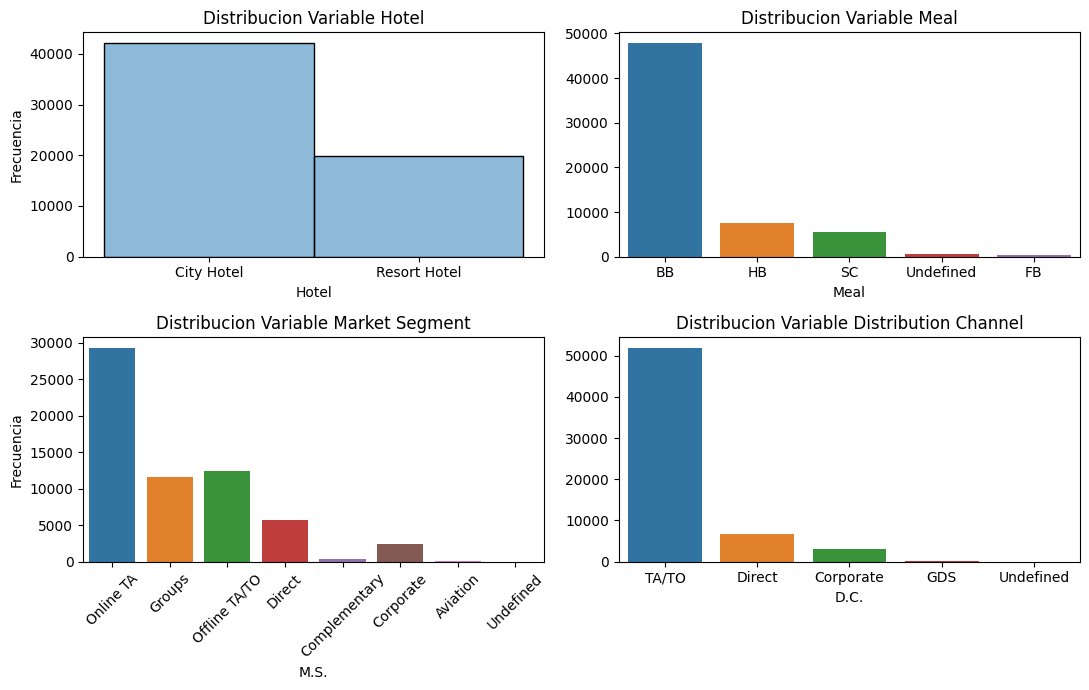

In [232]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11, 7))

#Histograma con todos los valores de Hotel
sns.histplot(data=df['hotel'], alpha = 0.5,ax=axes[0][0]).set(title="Distribucion Variable Hotel",xlabel="Hotel",ylabel="Frecuencia")

#Histograma con todos los valores de Meal
sns.countplot(x='meal', data=df,ax=axes[0][1]).set(title="Distribucion Variable Meal",xlabel="Meal",ylabel="")

#Market Segment
sns.countplot(x='market_segment', data=df,ax=axes[1][0]).set(title="Distribucion Variable Market Segment",xlabel="M.S.",ylabel="Frecuencia")
axes[1][0].tick_params(axis='x', rotation=45)

#Distribution Channel
sns.countplot(x='distribution_channel', data=df, ax=axes[1][1]).set(title="Distribucion Variable Distribution Channel",xlabel="D.C.",ylabel="")

plt.tight_layout()
plt.show()

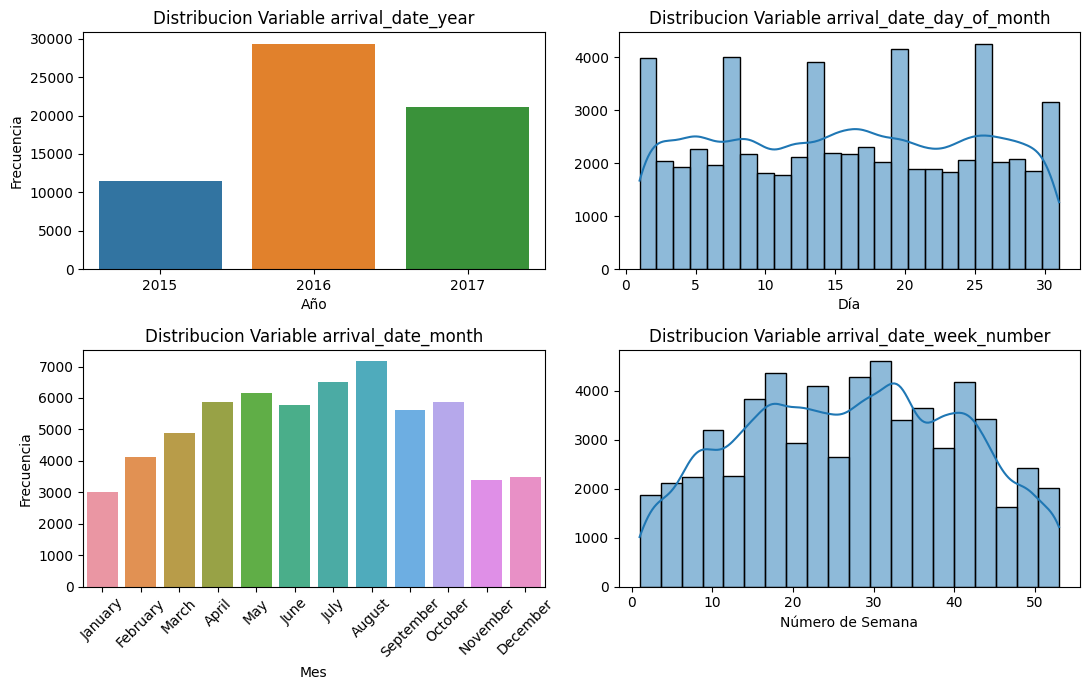

In [233]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11, 7))

#Histograma con todos los valores de arrival_date_year
sns.countplot(x='arrival_date_year', data=df,ax=axes[0][0]).set(title="Distribucion Variable arrival_date_year",xlabel="Año",ylabel="Frecuencia")

#arrival_date_day_of_month
sns.histplot(x='arrival_date_day_of_month', data=df,bins=25,kde=True,ax=axes[0][1]).set(title="Distribucion Variable arrival_date_day_of_month",xlabel="Día",ylabel="")

#Histograma con todos los valores de arrival_date_month
meses = ["January","February","March","April","May","June","July","August","September","October","November","December"]
sns.countplot(x='arrival_date_month', data=df, order=meses,ax=axes[1][0]).set(title="Distribucion Variable arrival_date_month",xlabel="Mes",ylabel="Frecuencia")
axes[1][0].tick_params(axis='x', rotation=45)

#arrival_date_week_number
sns.histplot(x='arrival_date_week_number', data=df,bins=20,kde=True,ax=axes[1][1]).set(title="Distribucion Variable arrival_date_week_number",xlabel="Número de Semana",ylabel="")

plt.tight_layout()
plt.show()

(array([16617., 16709., 16801., 16892., 16983., 17075., 17167., 17257.,
        17348., 17440.]),
 [Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01'),
  Text(17257.0, 0, '2017-04'),
  Text(17348.0, 0, '2017-07'),
  Text(17440.0, 0, '2017-10')])

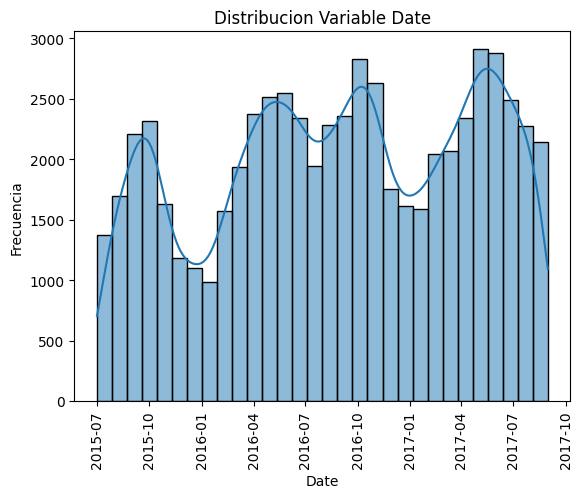

In [234]:
hist_adultos_total=sns.histplot(data=df_filtrado['date'], alpha = 0.5, bins=30,  kde=True).set(title="Distribucion Variable Date",xlabel="Date",ylabel="Frecuencia")
plt.xticks(rotation=90)

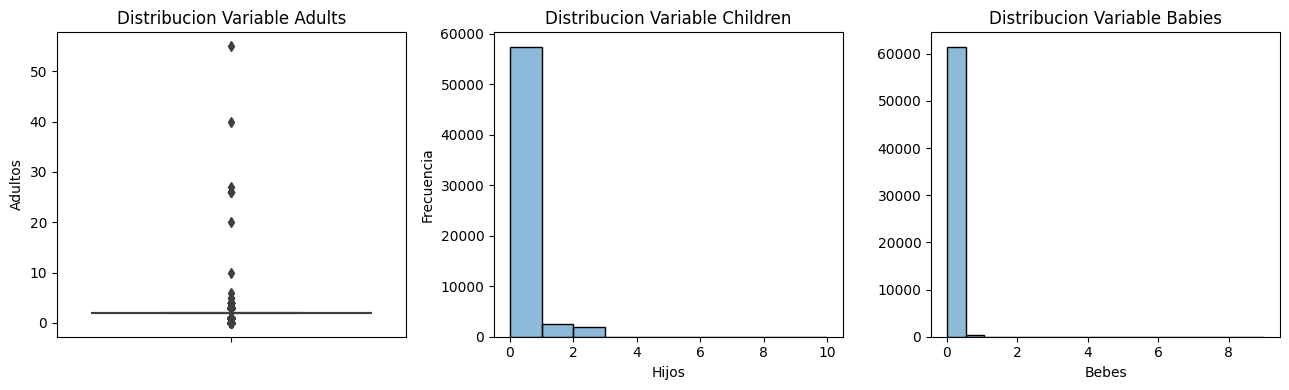

In [235]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13,4))

#Adults
sns.boxplot(y="adults", data=df,ax=axes[0]).set(title="Distribucion Variable Adults",xlabel=" ",ylabel="Adultos")

#Children
sns.histplot(data=df['children'], alpha = 0.5,ax=axes[1],bins=10,).set(title="Distribucion Variable Children",xlabel="Hijos",ylabel="Frecuencia")

#Babies
sns.histplot(data=df['babies'],alpha = 0.5,ax=axes[2]).set(title="Distribucion Variable Babies",xlabel="Bebes",ylabel="")

plt.tight_layout()
plt.show()

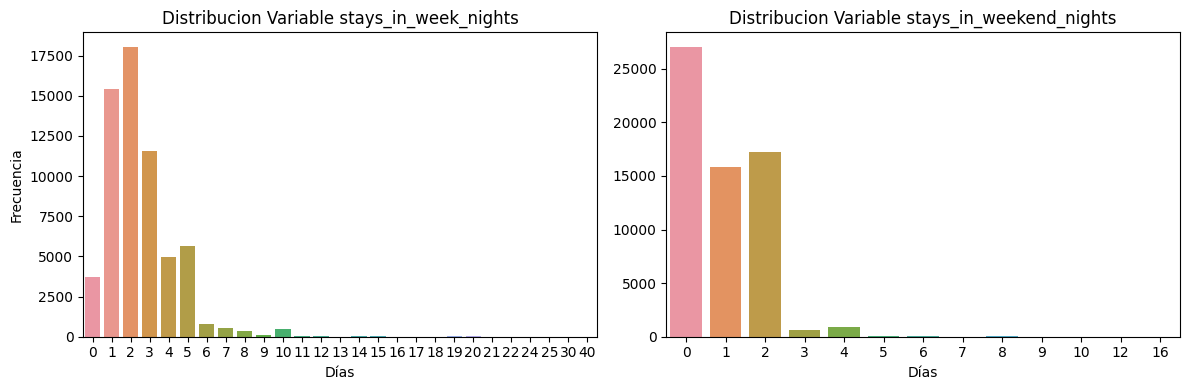

In [236]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,4))

#Weedays
sns.countplot(x='stays_in_week_nights', ax=axes[0],data=df).set(title="Distribucion Variable stays_in_week_nights",xlabel="Días",ylabel="Frecuencia")

#Weekends
sns.countplot(data=df, x='stays_in_weekend_nights',ax=axes[1]).set(title="Distribucion Variable stays_in_weekend_nights",xlabel="Días",ylabel="")

plt.tight_layout()
plt.show()

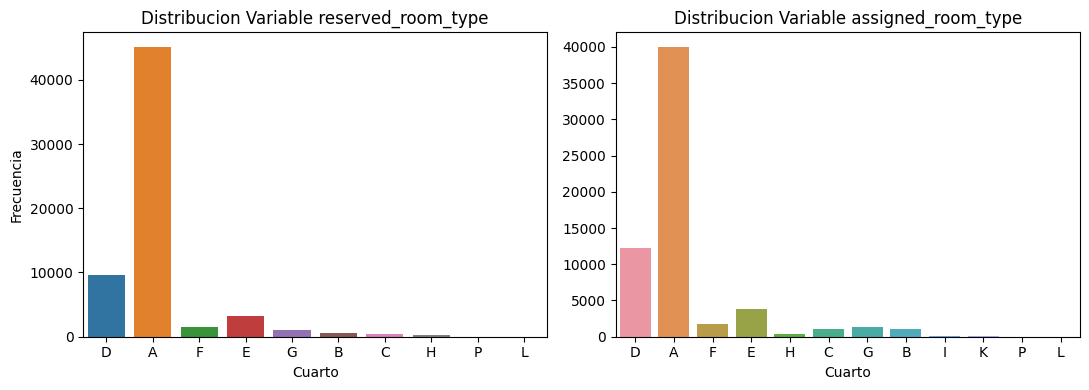

In [237]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11,4))

#Reserved room
sns.countplot(x='reserved_room_type', data=df,ax=axes[0]).set(title="Distribucion Variable reserved_room_type",xlabel="Cuarto",ylabel="Frecuencia")

#Weekends
sns.countplot(x='assigned_room_type', data=df,ax=axes[1]).set(title="Distribucion Variable assigned_room_type",xlabel="Cuarto",ylabel="")

plt.tight_layout()
plt.show()

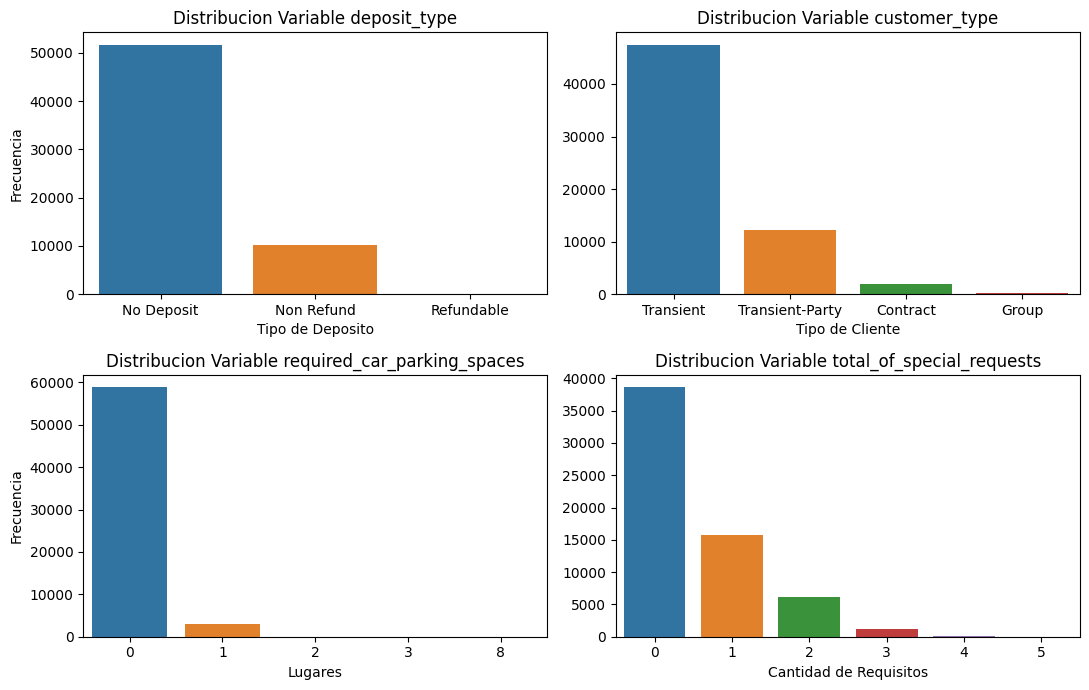

In [238]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11, 7))

#Deposit Type
sns.countplot(x='deposit_type', data=df,ax=axes[0][0]).set(title="Distribucion Variable deposit_type",xlabel="Tipo de Deposito",ylabel="Frecuencia")

#customer_type
sns.countplot(x='customer_type', data=df,ax=axes[0][1]).set(title="Distribucion Variable customer_type",xlabel="Tipo de Cliente",ylabel="")

#required_car_parking_spaces
sns.countplot(x='required_car_parking_spaces', data=df,ax=axes[1][0]).set(title="Distribucion Variable required_car_parking_spaces",xlabel="Lugares",ylabel="Frecuencia")

#total_of_special_requests
sns.countplot(x='total_of_special_requests', data=df,ax=axes[1][1]).set(title="Distribucion Variable total_of_special_requests",xlabel="Cantidad de Requisitos",ylabel="")

plt.tight_layout()
plt.show()

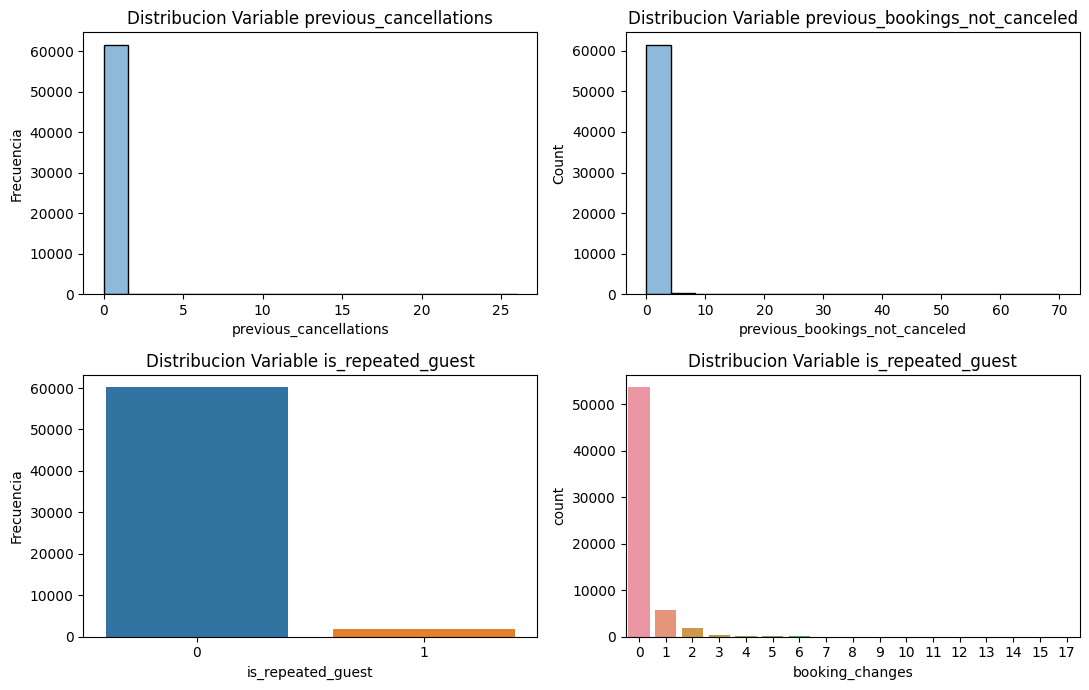

In [239]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11, 7))

#previous_cancellations
sns.histplot(x='previous_cancellations', data=df, alpha = 0.5,ax=axes[0][0]).set(title="Distribucion Variable previous_cancellations",xlabel="previous_cancellations",ylabel="Frecuencia")

#previous_bookings_not_canceled
sns.histplot(x= 'previous_bookings_not_canceled', data=df, alpha = 0.5,ax=axes[0][1]).set(title="Distribucion Variable previous_bookings_not_canceled",xlabel="previous_bookings_not_canceled")

#is_repeated_guest
sns.countplot(x='is_repeated_guest', data=df,ax=axes[1][0]).set(title="Distribucion Variable is_repeated_guest",xlabel="is_repeated_guest",ylabel="Frecuencia")

#booking_changes
sns.countplot(x='booking_changes', data=df,ax=axes[1][1]).set(title="Distribucion Variable is_repeated_guest",xlabel="booking_changes")

plt.tight_layout()
plt.show()

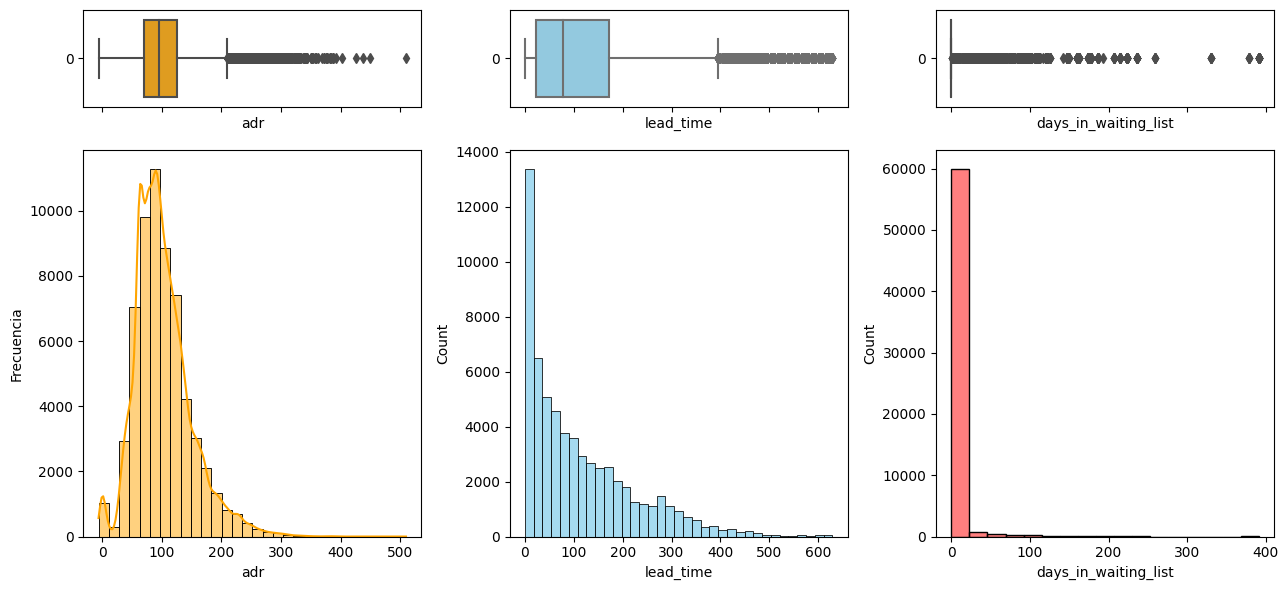

In [240]:
fig, axes = plt.subplots(nrows=2, ncols=3, sharex='col', figsize=(13, 6),gridspec_kw={"height_ratios": (.2, .8)})

#adr
sns.boxplot(df['adr'], orient='h', color='orange',ax=axes[0][0]).set(xlabel="adr")
sns.histplot(data=df['adr'], color='orange', bins=30, kde=True,ax=axes[1][0]).set(xlabel="adr",ylabel="Frecuencia")

#lead time
sns.boxplot(df['lead_time'], orient='h', color='skyblue',ax=axes[0][1]).set(xlabel="lead_time")
sns.histplot(data=df['lead_time'], color='skyblue',bins=35,ax=axes[1][1]).set(xlabel="lead_time")

#days in waiting list
sns.boxplot(df['days_in_waiting_list'], orient='h', color='red',ax=axes[0][2]).set(xlabel="days_in_waiting_list")
sns.histplot(data=df['days_in_waiting_list'], color = 'red',alpha = 0.5,ax=axes[1][2]).set(xlabel="days_in_waiting_list")

plt.tight_layout()
plt.show()

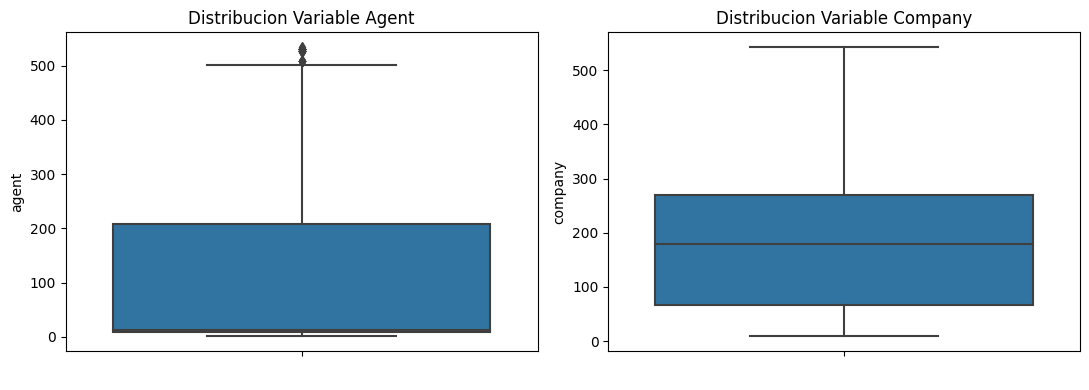

In [241]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11,4))

#Agente
# sns.countplot(x='agent', data=df).set(title="Distribucion Variable Agent",xlabel="Agent",ylabel="Frecuencia") #son demasiados
sns.boxplot(y="agent", data=df,ax=axes[0]).set(title="Distribucion Variable Agent",xlabel=" ",ylabel="agent")

#Compania
#sns.countplot(x='company', data=df).set(title="Distribucion Variable Company",xlabel="Company",ylabel="Frecuencia") #demasiados
sns.boxplot(y="company", data=df,ax=axes[1]).set(title="Distribucion Variable Company", xlabel="",ylabel="company")

plt.tight_layout()
plt.show()

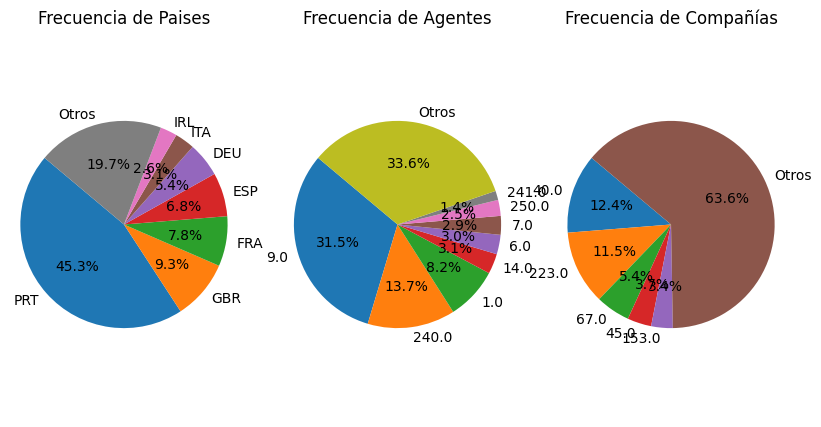

In [242]:
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

# 1. Calcular las frecuencias
frecuencias = df['country'].value_counts()
frecuencias_agent = df['agent'].value_counts()
frecuencias_company = df['company'].value_counts()

# 2. Identificar y agrupar por frecuencias bajas
umbral_country = 1500
umbral_agent = 750  # Define un umbral de frecuencia para agrupar agents
umbral_company = 100

paises_principales, agentes_principales, companias_principales = (frecuencias[frecuencias >= umbral_country], frecuencias_agent[frecuencias_agent >= umbral_agent], frecuencias_company[frecuencias_company >= umbral_company])
otros_paises, otros_agentes, otros_companies = (frecuencias[frecuencias < umbral_country], frecuencias_agent[frecuencias_agent < umbral_agent], frecuencias_company[frecuencias_company < umbral_company])

otros_paises_total, otros_agentes_total, otros_companies_total = (otros_paises.sum(), otros_agentes.sum(), otros_companies.sum())
paises_principales['Otros'], agentes_principales['Otros'], companias_principales['Otros'] = (otros_paises_total, otros_agentes_total, otros_companies_total)

# 3. Crear los DataFrames
df_paises = pd.DataFrame({'Pais': paises_principales.index, 'Frecuencia': paises_principales.values})
df_agentes = pd.DataFrame({'agent': agentes_principales.index, 'Frecuencia': agentes_principales.values})
df_companies = pd.DataFrame({'company': companias_principales.index, 'Frecuencia': companias_principales.values})

# 4. Crear los pie chart
axes[0].pie(df_paises['Frecuencia'], labels=df_paises['Pais'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('Frecuencia de Paises')
axes[0].axis('equal')

axes[1].pie(df_agentes['Frecuencia'], labels=df_agentes['agent'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('Frecuencia de Agentes')
axes[1].axis('equal')  # Para que el gráfico sea un círculo

axes[2].pie(df_companies['Frecuencia'], labels=df_companies['company'], autopct='%1.1f%%', startangle=140)
axes[2].set_title('Frecuencia de Compañías')
axes[2].axis('equal')  # Para que el gráfico sea un círculo

plt.show()

La gran mayoría de los países es PRT.

Hay un tercio de agentes que aparecen menos de 750 veces.

La mayoría de las compañías aparecen menos de 100 veces.

<Axes: xlabel='is_canceled', ylabel='count'>

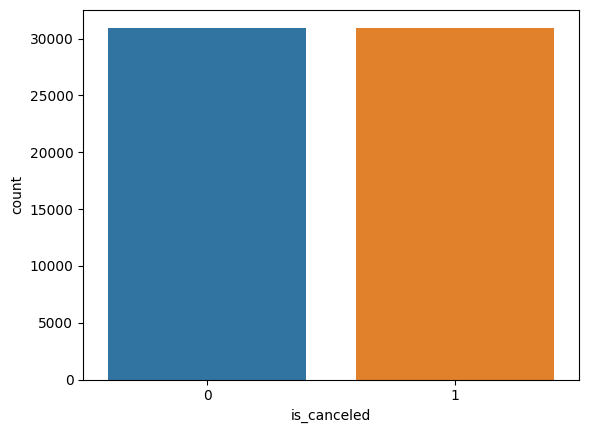

In [243]:
sns.countplot(x='is_canceled', data=df)

## Analizando las Correlaciones Existentes

En el grafico se muestran unicamente valores cuantitativos ya que los valores cualitativos no se puede calcular sus correlaciones,

Se puede ver que "arrival_date_week_number" y "arrival_date_year" tienen una gran correlación negativa. "adr" y "children" tienen una buena correlación positiva y podemos inferir a partir de estos resultados que a mayor cantidad de hijos es mayor la tasa por día, "stays_in_week_nights" y "stays_in_weekend_nights" tienen una buena correlación positiva, lo cual nos se puede interpretar como a mayor cantidad de noches de semana hay más noches de fin de semana, lo cual es logico.

In [244]:
df_cuantitativas.corr()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
lead_time,1.000000,0.023186,0.134793,-0.006937,0.059463,0.140110,0.110942,-0.046058,-0.022872,0.094634,-0.068102,-0.019736,0.166423,-0.094559,-0.113772,-0.122760
arrival_date_year,0.023186,1.000000,-0.540542,0.002326,0.027066,0.040803,0.026576,0.059412,-0.013745,-0.142232,0.027109,0.027285,-0.058523,0.217409,-0.011620,0.107899
arrival_date_week_number,0.134793,-0.540542,1.000000,0.057730,0.014127,0.012200,0.025886,0.006355,0.016215,0.045530,-0.023897,0.012086,0.019328,0.075427,0.001424,0.029283
arrival_date_day_of_month,-0.006937,0.002326,0.057730,1.000000,-0.015518,-0.026449,0.002449,0.013991,0.002568,-0.034516,-0.002026,0.009522,0.027754,0.033695,0.000295,0.007744
stays_in_weekend_nights,0.059463,0.027066,0.014127,-0.015518,1.000000,0.488710,0.083397,0.051987,0.021991,-0.011110,-0.037958,0.043753,-0.057509,0.061136,-0.014228,0.072150
stays_in_week_nights,0.140110,0.040803,0.012200,-0.026449,0.488710,1.000000,0.087992,0.058278,0.021390,-0.013417,-0.045190,0.070094,-0.004139,0.082910,-0.021657,0.073356
adults,0.110942,0.026576,0.025886,0.002449,0.083397,0.087992,1.000000,0.029215,0.014812,-0.003197,-0.096896,-0.045378,-0.009420,0.221538,0.010593,0.107599
children,-0.046058,0.059412,0.006355,0.013991,0.051987,0.058278,0.029215,1.000000,0.028946,-0.027296,-0.019686,0.058871,-0.035480,0.350482,0.045272,0.080017
babies,-0.022872,-0.013745,0.016215,0.002568,0.021991,0.021390,0.014812,0.028946,1.000000,-0.007734,-0.005790,0.088186,-0.010863,0.033735,0.036372,0.093348
previous_cancellations,0.094634,-0.142232,0.045530,-0.034516,-0.011110,-0.013417,-0.003197,-0.027296,-0.007734,1.000000,0.131019,-0.029569,0.004080,-0.080192,-0.019565,-0.052445


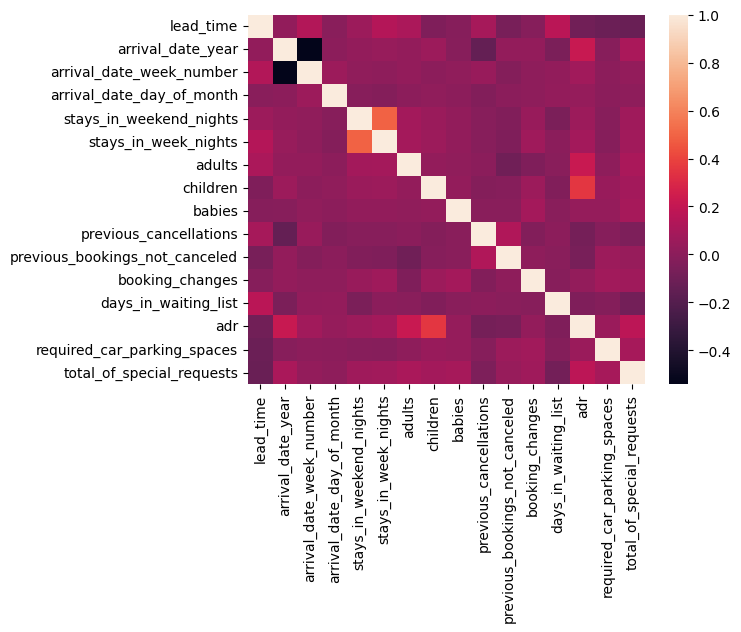

In [245]:
matriz_correlacion=df_cuantitativas.corr()
sns.heatmap(matriz_correlacion, annot = False)

plt.show()

### *Hoteles* vs *Previos Bookings No Cancelados*

**Dato de color:** Notamos que solo para el City Hotel tenemos los casos de previous_bookings_not_canceled > 30.

In [246]:
# Toda la gente que repitio hotel mas de 30 veces fueron todoas al City Hotel
print(df.loc[df.previous_bookings_not_canceled > 30].shape == df.loc[(df.previous_bookings_not_canceled > 30) & (df.hotel == 'City Hotel')].shape)

True


Text(0.5, 1.0, 'Hotel vs reservas previas no canceladas')

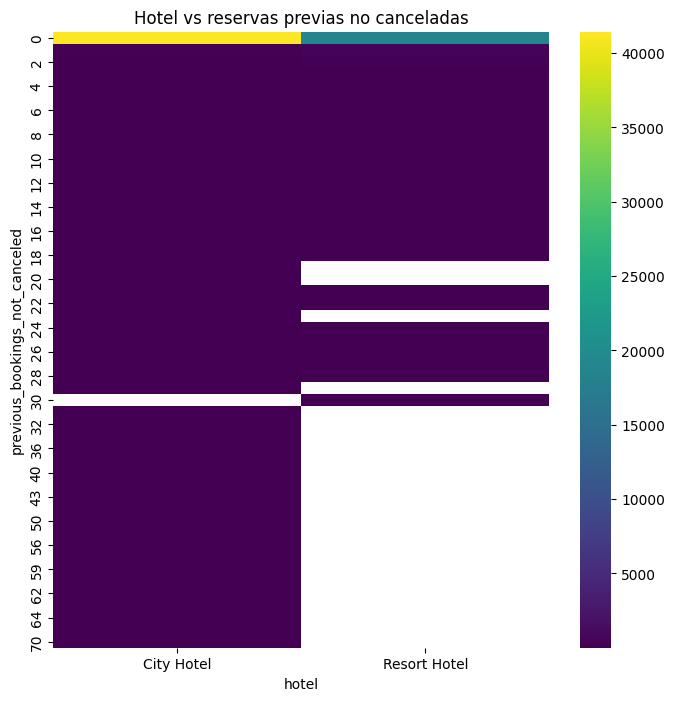

In [247]:
heatmap_mejorado(df, "hotel", "previous_bookings_not_canceled", 1, 'viridis')
plt.title("Hotel vs reservas previas no canceladas")

### *Agente* vs *Pais*

Nos aseguramos que no haya relación directa entre el agente y el pais.

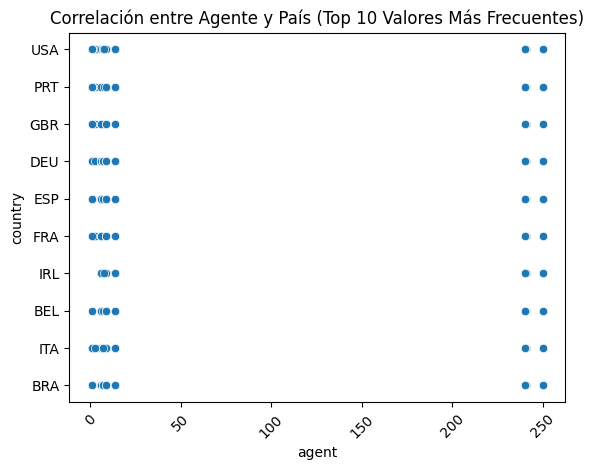

In [248]:

top_10_agentes = df['agent'].value_counts().head(10).index
top_10_paises = df['country'].value_counts().head(10).index

df_filtered = df[df['agent'].isin(top_10_agentes) & df['country'].isin(top_10_paises)]

sns.scatterplot(data=df_filtered, x='agent', y='country')
plt.xlabel('agent')
plt.ylabel('country')
plt.title('Correlación entre Agente y País (Top 10 Valores Más Frecuentes)')
plt.xticks(rotation=45)  # Para rotar las etiquetas del eje x si es necesario
plt.show()

### Hotel vs mes de arribo

Se puede ver que a lo largo de todos los meses el favorito fue el City Hotel.

Text(0.5, 1.0, 'Hotel vs mes de arribo')

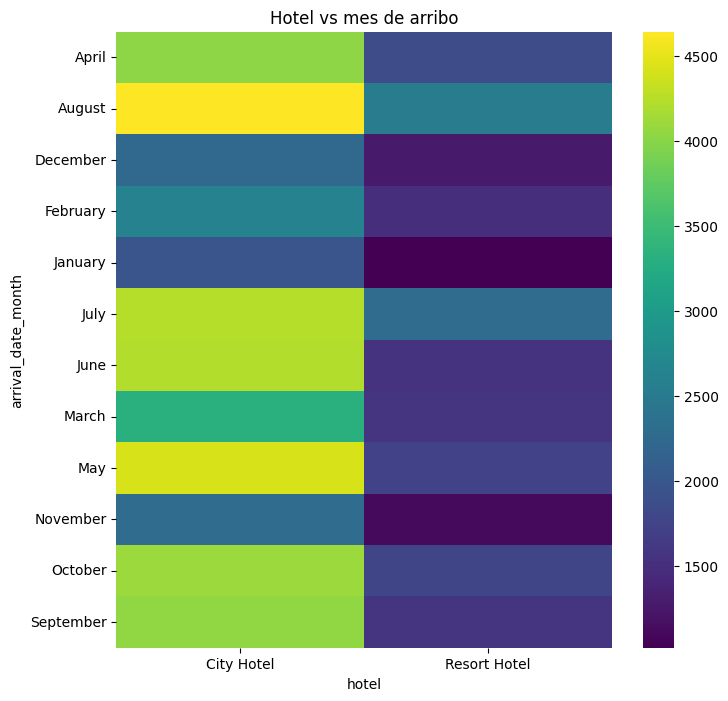

In [249]:
heatmap_mejorado(df, "hotel", "arrival_date_month", 1, 'viridis')
plt.title("Hotel vs mes de arribo")

## Analizando la Relación de las Variables con el Target

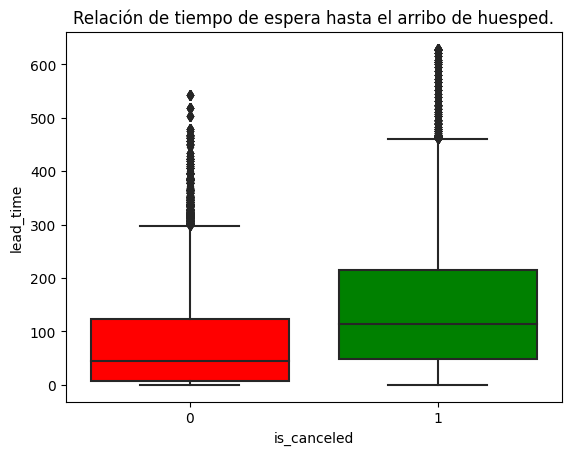

In [250]:
sns_boxplot_fare_pclass=sns.boxplot(x="is_canceled",y="lead_time", data=df, palette=["r", "g"], saturation=10.0).set(title="Relación de tiempo de espera hasta el arribo de huesped.",xlabel='is_canceled',ylabel='lead_time')

In [251]:
meses = ['January','February', 'March', 'April','May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

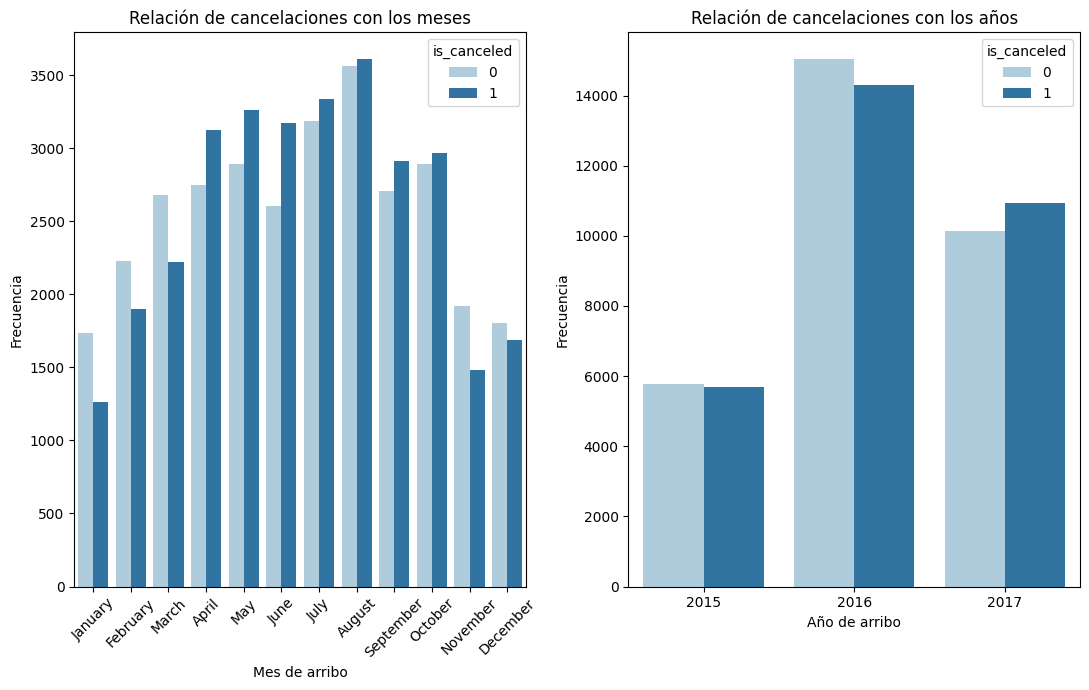

In [252]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 7))

sns.countplot(data=df, x='arrival_date_month', hue='is_canceled', palette='Paired', order=meses, ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set( title='Relación de cancelaciones con los meses', xlabel="Mes de arribo", ylabel="Frecuencia")

sns.countplot(data=df, x='arrival_date_year', hue='is_canceled', palette='Paired', ax=axes[1])
axes[1].set(title="Relación de cancelaciones con los años", xlabel="Año de arribo", ylabel="Frecuencia")

plt.tight_layout()
plt.show()

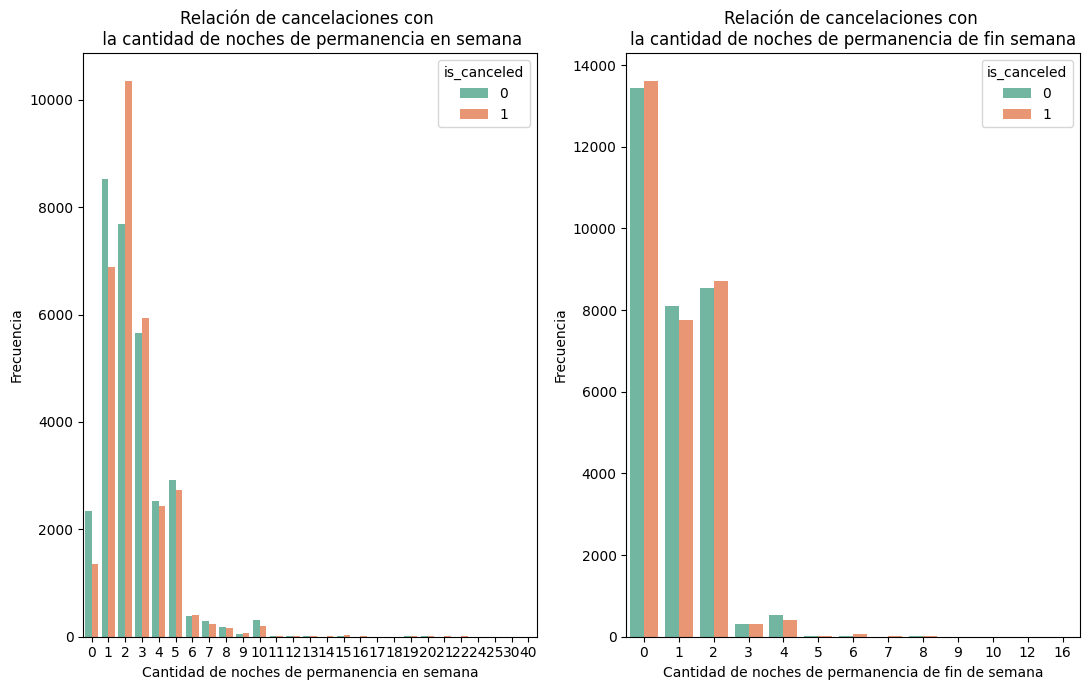

In [253]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 7))

sns.countplot(data=df, x='stays_in_week_nights', hue='is_canceled', palette='Set2',  ax=axes[0])
axes[0].set(title='Relación de cancelaciones con \n la cantidad de noches de permanencia en semana', xlabel="Cantidad de noches de permanencia en semana", ylabel="Frecuencia")

sns.countplot(data=df, x='stays_in_weekend_nights', hue='is_canceled', palette='Set2', ax=axes[1])
axes[1].set(title="Relación de cancelaciones con \nla cantidad de noches de permanencia de fin semana", xlabel="Cantidad de noches de permanencia de fin de semana", ylabel="Frecuencia")

plt.tight_layout()
plt.show()

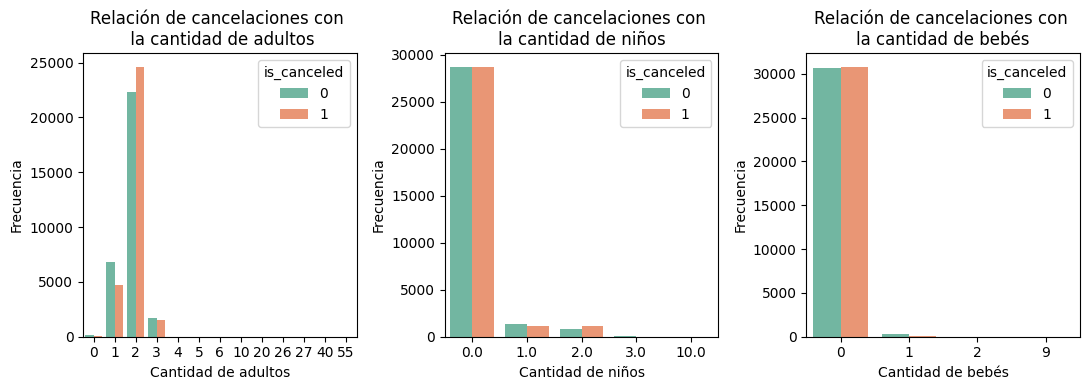

In [254]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(11, 4))

sns.countplot(data=df, x='adults', hue='is_canceled', palette='Set2', ax=axes[0])
axes[0].set(title='Relación de cancelaciones con \n la cantidad de adultos', xlabel="Cantidad de adultos", ylabel="Frecuencia")

sns.countplot(data=df, x='children', hue='is_canceled', palette='Set2', ax=axes[1])
axes[1].set(title="Relación de cancelaciones con \nla cantidad de niños", xlabel="Cantidad de niños", ylabel="Frecuencia")

sns.countplot(data=df, x='babies', hue='is_canceled', palette='Set2', ax=axes[2])
axes[2].set(title="Relación de cancelaciones con \nla cantidad de bebés", xlabel="Cantidad de bebés", ylabel="Frecuencia")

plt.tight_layout()
plt.show()

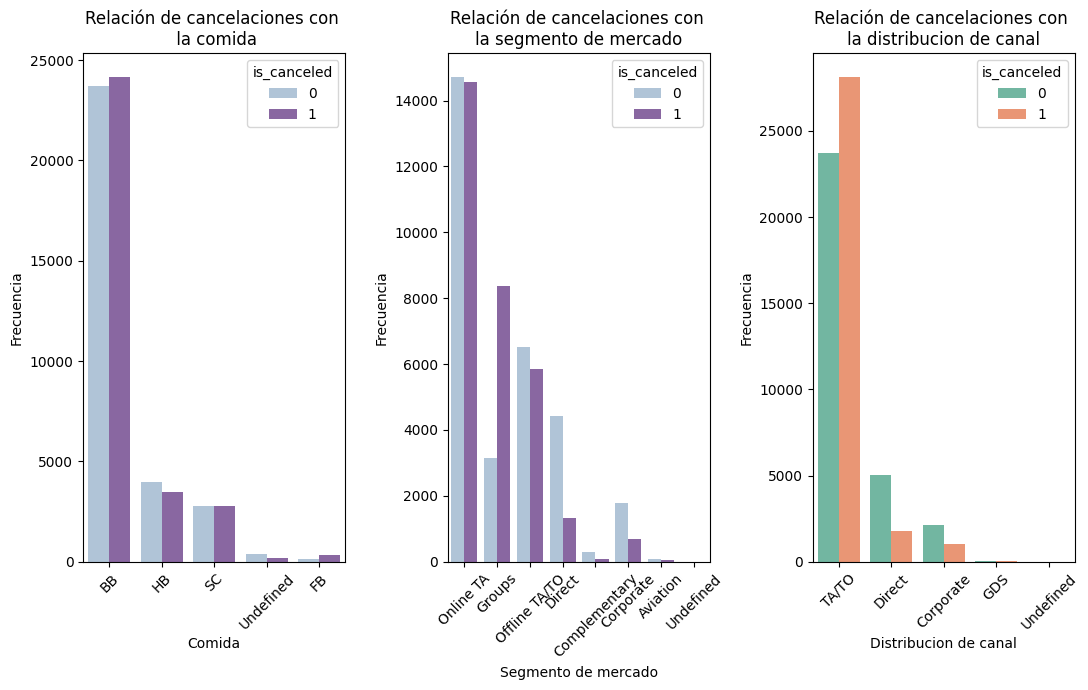

In [255]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(11, 7))

sns.countplot(data=df, x='meal', hue='is_canceled', palette="BuPu", ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
axes[0].set(title='Relación de cancelaciones con \n la comida', xlabel="Comida", ylabel="Frecuencia")

sns.countplot(data=df, x='market_segment', hue='is_canceled', palette='BuPu', ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].set(title="Relación de cancelaciones con \nla segmento de mercado", xlabel="Segmento de mercado", ylabel="Frecuencia")

sns.countplot(data=df, x='distribution_channel', hue='is_canceled', palette='Set2', ax=axes[2])
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)
axes[2].set(title="Relación de cancelaciones con \nla distribucion de canal", xlabel="Distribucion de canal", ylabel="Frecuencia")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Relación entre los días en la lista de espera y si la reserva fue cancelada')

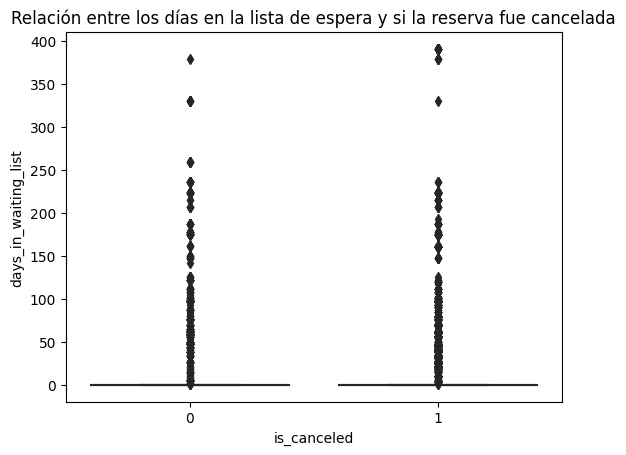

In [256]:
sns_boxplot_fare_pclass=sns.boxplot(x="is_canceled",y="days_in_waiting_list", data=df, palette=["r", "g"], saturation=10.0).set(xlabel='is_canceled',ylabel='days_in_waiting_list')
plt.title('Relación entre los días en la lista de espera y si la reserva fue cancelada')

Text(0.5, 1.0, 'Relación entre la tasa promedio de la tarifa y si la reserva fue cancelada')

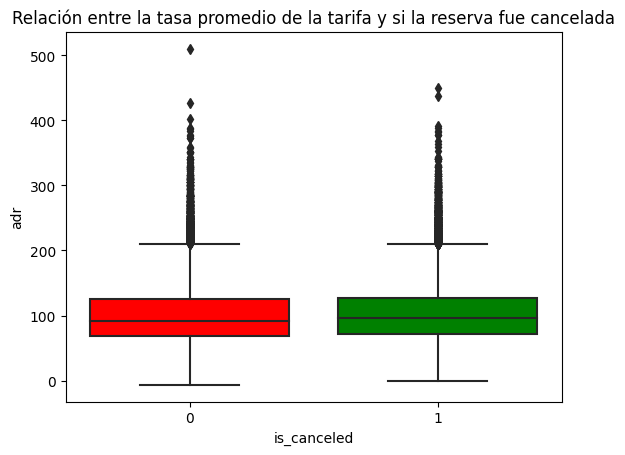

In [257]:
sns_boxplot_fare_pclass=sns.boxplot(x="is_canceled",y="adr", data=df, palette=["r", "g"], saturation=10.0).set(xlabel='is_canceled',ylabel='adr')
plt.title('Relación entre la tasa promedio de la tarifa y si la reserva fue cancelada')

### Espacios para parking
Podemos apreciar que aquellos que solicitaron el servicio no cancelaron.

Text(0.5, 1.0, 'relacion entre la cantidad de espacios para parking y si cancelaron o no.')

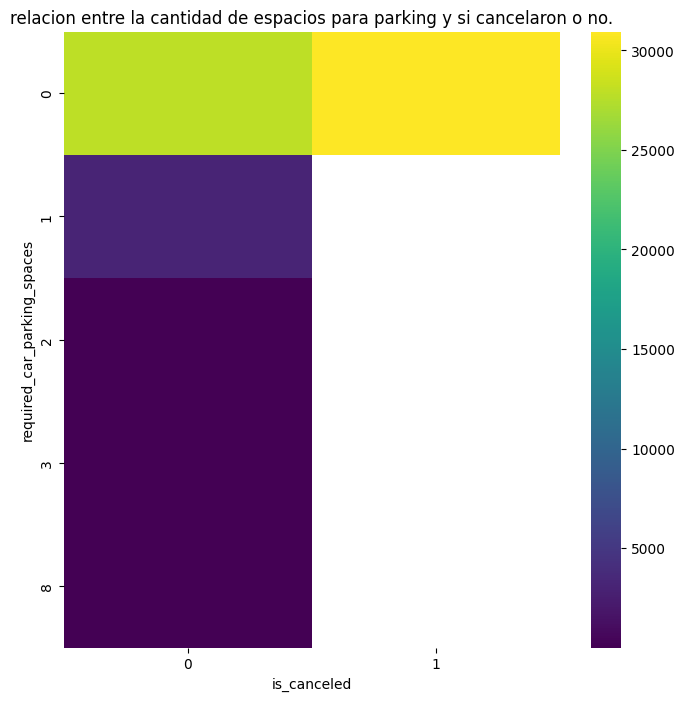

In [258]:
heatmap_mejorado(df, "is_canceled", "required_car_parking_spaces", 1, 'viridis')
plt.title("relacion entre la cantidad de espacios para parking y si cancelaron o no.")

## Agregando visualizaciones interesantes
___

In [259]:
df.columns

Index(['hotel', 'lead_time', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'id',
       'is_canceled'],
      dtype='object')

<Axes: xlabel='days_in_waiting_list', ylabel='adr'>

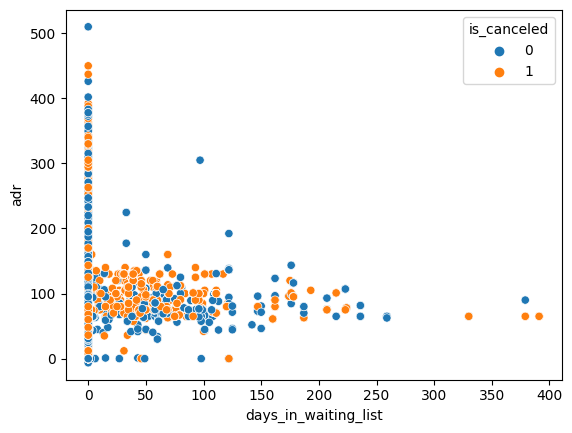

In [260]:
sns.scatterplot(data=df, x="days_in_waiting_list", y="adr", hue="is_canceled")

<Axes: xlabel='arrival_date_month', ylabel='adr'>

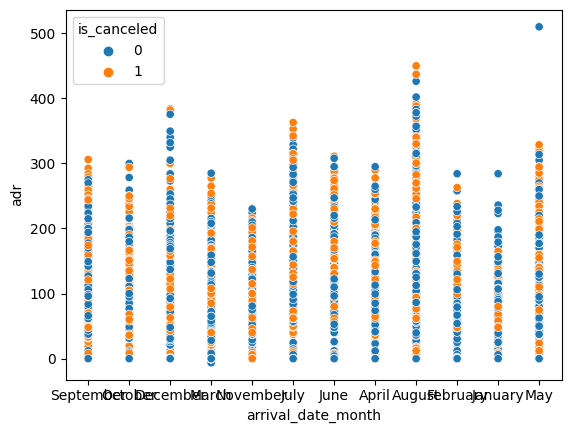

In [261]:
sns.scatterplot(data=df, x="arrival_date_month", y="adr", hue="is_canceled")

# Datos Faltantes
___

A continuación podemos ver el porcentaje de NaNs de cada columna del DataFrame original

In [262]:
filas_totales=df.shape[0]
print(df.isna().sum()/filas_totales*100)

hotel                              0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.006461
babies                             0.000000
meal                               0.000000
country                            0.356952
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
agent                           

(array([0, 1, 2, 3]),
 [Text(0, 0, 'children'),
  Text(1, 0, 'country'),
  Text(2, 0, 'agent'),
  Text(3, 0, 'company')])

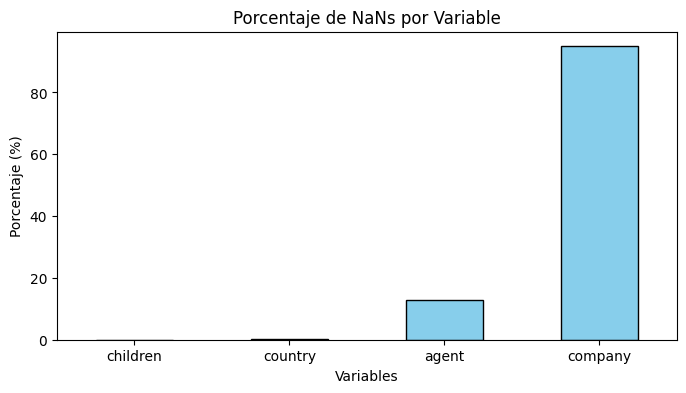

In [263]:
porcentaje_nan = (df.isna().sum() / len(df)) * 100
porcentaje_nan = porcentaje_nan[porcentaje_nan>0]

plt.figure(figsize=(8, 4))
porcentaje_nan.plot(kind='bar', color='skyblue', edgecolor='black').set(title='Porcentaje de NaNs por Variable', xlabel = 'Variables', ylabel = 'Porcentaje (%)')
plt.xticks(rotation=0)

## *Children* Faltantes

In [264]:
df[df.children.isna()]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
27359,City Hotel,1,2015,August,32,5,0,2,3,NaN,...,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,6ad2b270-d3ae-464f-9d4d-0722e4c4e7bc,1
32654,City Hotel,1,2015,August,32,5,0,2,2,NaN,...,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,af8b8f11-dae4-494a-81f9-9aabb9d3b9ba,1
50323,City Hotel,8,2015,August,33,13,2,5,2,NaN,...,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,322fd306-7177-4752-88c2-891293fceba6,1
58511,City Hotel,2,2015,August,32,3,1,0,2,NaN,...,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,d94b4fca-243f-498c-a52f-14b52e7e5e72,1


Al ser tan pocos casos, los vamos a reemplazar con un cero para no cambiar demasiado la moda (0) y media (0.104896).

In [265]:
df_filtrado.children = df_filtrado.children.replace(np.nan, 0)
print(f'Nueva media: {df_filtrado.children.mean().round(6)}\nNueva Moda:  {df_filtrado.children.mode()}\n')

Nueva media: 0.104889
Nueva Moda:  0    0.0
Name: children, dtype: float64



## *Agent* Faltantes

In [266]:
df[df.agent.isna()].shape

(7890, 31)

Reemplazamos los NaNs por el agente 9.0, que es la moda.

In [267]:
moda_vieja = df.agent.mode()
df_filtrado.agent = df_filtrado.agent.replace(np.nan, 9)
moda_nueva = df.agent.mode()
print(f'Moda Vieja: {moda_vieja}\nModa Nueva: {moda_nueva}')

Moda Vieja: 0    9.0
Name: agent, dtype: float64
Moda Nueva: 0    9.0
Name: agent, dtype: float64


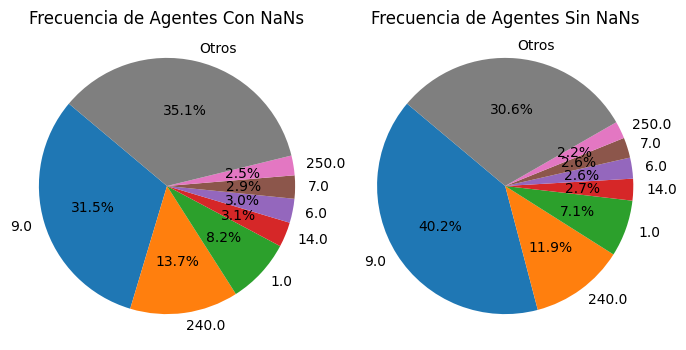

In [268]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

frecuencias_viejas = df['agent'].value_counts()
frecuencias_nuevas = df_filtrado['agent'].value_counts()

umbral_frecuencia = 1000  # Define un umbral de frecuencia para agrupar países
principales_viejos, principales_nuevos = (frecuencias_viejas[frecuencias_viejas >= umbral_frecuencia], frecuencias_nuevas[frecuencias_nuevas >= umbral_frecuencia])
otros_agentes_viejos, otros_agentes_nuevos = (frecuencias_viejas[frecuencias_viejas < umbral_frecuencia], frecuencias_nuevas[frecuencias_nuevas < umbral_frecuencia])
otros_agentes_total_viejos, otros_agentes_total_nuevos = otros_agentes_viejos.sum(), otros_agentes_nuevos.sum()
principales_viejos['Otros'], principales_nuevos['Otros'] = otros_agentes_total_viejos, otros_agentes_total_nuevos

# 3. Crear un nuevo DataFrame con los países agrupados
viejos_df = pd.DataFrame({'agente': principales_viejos.index, 'Frecuencia': principales_viejos.values})
nuevos_df = pd.DataFrame({'agente': principales_nuevos.index, 'Frecuencia': principales_nuevos.values})

# 4. Crear el pie chart
axes[0].pie(viejos_df['Frecuencia'], labels=viejos_df['agente'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('Frecuencia de Agentes Con NaNs')
axes[0].axis('equal')

axes[1].pie(nuevos_df['Frecuencia'], labels=nuevos_df['agente'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('Frecuencia de Agentes Sin NaNs')
axes[1].axis('equal')

plt.show()

## *Country* Faltantes

In [269]:
df[df.country.isna()].shape

(221, 31)

Al ser tan pocos los casos en comparacion a la cantidad total de filas (es solo un 0.356952% de NaNs) decidimos reemplazarlos por la moda que es PRT

In [270]:
df_filtrado['country'] = df_filtrado['country'].replace(np.nan, 'PRT')

df_country = pd.DataFrame()
df_country['country_con_nans'] = df['country']
df_country['country_sin_nans'] = df_filtrado['country']
df_country.describe()

,country_con_nans,country_sin_nans
count,61692,61913
unique,149,149
top,PRT,PRT
freq,27950,28171


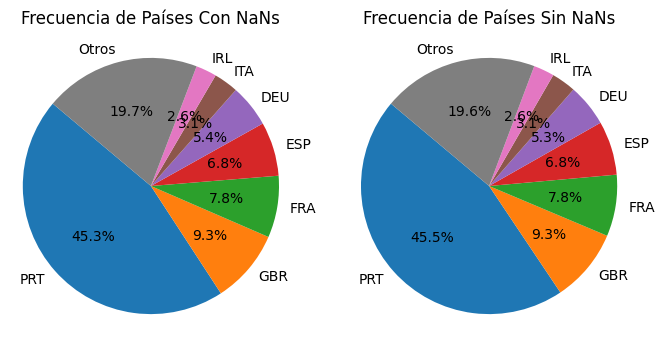

In [271]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

frecuencias_viejas = df['country'].value_counts()
frecuencias_nuevas = df_filtrado['country'].value_counts()

umbral_frecuencia = 1500  # Define un umbral de frecuencia para agrupar países
principales_viejos, principales_nuevos = (frecuencias_viejas[frecuencias_viejas >= umbral_frecuencia], frecuencias_nuevas[frecuencias_nuevas >= umbral_frecuencia])
otros_paises_viejos, otros_paises_nuevos = (frecuencias_viejas[frecuencias_viejas < umbral_frecuencia], frecuencias_nuevas[frecuencias_nuevas < umbral_frecuencia])
otros_paises_total_viejos, otros_paises_total_nuevos = otros_paises_viejos.sum(), otros_paises_nuevos.sum()
principales_viejos['Otros'], principales_nuevos['Otros'] = otros_paises_total_viejos, otros_paises_total_nuevos

# 3. Crear un nuevo DataFrame con los países agrupados
viejos_df = pd.DataFrame({'Pais': principales_viejos.index, 'Frecuencia': principales_viejos.values})
nuevos_df = pd.DataFrame({'Pais': principales_nuevos.index, 'Frecuencia': principales_nuevos.values})

# 4. Crear el pie chart
axes[0].pie(viejos_df['Frecuencia'], labels=viejos_df['Pais'], autopct='%1.1f%%', startangle=140)
axes[0].set_title('Frecuencia de Países Con NaNs')
axes[0].axis('equal')

axes[1].pie(nuevos_df['Frecuencia'], labels=nuevos_df['Pais'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('Frecuencia de Países Sin NaNs')
axes[1].axis('equal')

plt.show()

#Valores Atipicos
___

Vamos a analizar los valores que nosotros consideramos atipicos

- 0 adultos    --> CAMBIAMOS POR 2
- 55 adultos   --> LO DEJAMOS
- 10 children  --> CAMBIAMOS POR 0
- 9 babies     --> CAMBAIMOS POR 0
- *adr* cero   --> CAMBIAMOS A MEDIANA
- *adr* negativo                --> LO CAMBIAMOS POR 0
- gente que se quedo 0 noches   --> NO CAMBIAMOS
- *lead_time* 629 BORRAMOS --> DUPLICADOS >600
- *previous_cancelations* --> 25 BORRAMOS DUPLICADOS >10
- *previous_bookings_not_canceled* --> SE DEJA
- *booking_changes* --> 17 POR AHORA SE DEJA
- *requiered_car_parking_spaces* --> 8 POR AHORA LO DEJAMOS
- ver si hay outliers en analisis multivariado (ej weekends con weedays)

## 0 *Adults*

Estos valores no tienen sentido ya que para hacer una reservación, uno tiene que ser mayor de edad, por lo cual nos hace pensar que estos fueron errores de computo.

Consideramos las opciones tanto de eliminar las filas que tengan adultos = 0, pero viendo que estos casos son pocos, pensamos que los datos de children > 0 debieron estar en adults. Otra opción considerada fue distribuir los que tienen 0 adults entre todos los otros valores de acuerdo al porcentaje que hay en dataframe de cada uno de esos datos.

In [272]:
df_filtrado[df_filtrado['adults'] == 0][['adults', 'children', 'babies']]

,adults,children,babies
96,0,2.0,0
212,0,2.0,0
270,0,0.0,0
326,0,2.0,0
464,0,0.0,0
...,...,...,...
59982,0,2.0,0
60837,0,0.0,0
60994,0,2.0,0
61003,0,0.0,0


In [273]:
df_filtrado[df_filtrado['adults'] == 0][['adults', 'children', 'babies']].value_counts()

adults  children  babies
0       2.0       0         115
        0.0       0          76
        3.0       0           4
        1.0       0           1
        2.0       1           1
dtype: int64

Nos decidimos por reemplazar los adultos que tienen un 0, por un 2, para mantener la moda

In [274]:
df_filtrado = df_filtrado.replace({'adults': 0}, value=2)

## 55 *Adults*

Este claramente es outlier, pero revisamos y tenemos que para valores > 4 los porcentajes de aparicion son menores a 0.004% respecto del total, lo cual nos resulta muy improbable, así que por ahora lo dejamos.

Ademas, despues de mas investigacion, nos dismos cuenta que todas las reservas con una cantidad >= 10 de adultos fue clasificado como grupos, lo cual hace que el valor sea menos raro.

In [275]:
df.loc[df.adults >=10]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
4064,Resort Hotel,304,2015,September,36,3,0,3,40,0.0,...,No Deposit,NaN,NaN,0,Group,0.0,0,0,ebb06f2f-1c79-490c-ae9f-8f7ba838d328,1
11830,Resort Hotel,334,2015,October,42,12,2,5,20,0.0,...,No Deposit,NaN,NaN,0,Group,0.0,0,0,b169d836-a93c-43a3-8bb4-9ec2afa66483,1
19146,Resort Hotel,354,2015,September,39,26,2,5,26,0.0,...,No Deposit,96.0,NaN,0,Group,0.0,0,0,edcaa4e3-8b46-4812-9d09-672cd8b73589,1
35477,Resort Hotel,334,2015,October,42,12,2,5,10,0.0,...,No Deposit,NaN,NaN,0,Group,0.0,0,0,a2928fc5-26a1-4e9c-9be9-1d89f03dccf5,1
38305,Resort Hotel,340,2015,September,37,12,2,5,26,0.0,...,No Deposit,96.0,NaN,0,Group,0.0,0,0,f386dc39-94e7-4b56-9609-d12d80d9a6a8,1
55112,Resort Hotel,349,2015,September,39,21,1,3,27,0.0,...,No Deposit,NaN,NaN,0,Group,0.0,0,0,6ed0d330-fea1-4b4e-b9e8-cbdcdc514d7c,1
59059,Resort Hotel,333,2015,September,36,5,2,5,26,0.0,...,No Deposit,96.0,NaN,0,Group,0.0,0,0,62e325e1-4d46-4794-8d32-100a756074db,1
59165,Resort Hotel,338,2015,October,41,4,2,0,55,0.0,...,No Deposit,NaN,NaN,0,Group,0.0,0,0,9bf89c35-d6aa-4dfb-a0cb-2a3eb30bafd2,1


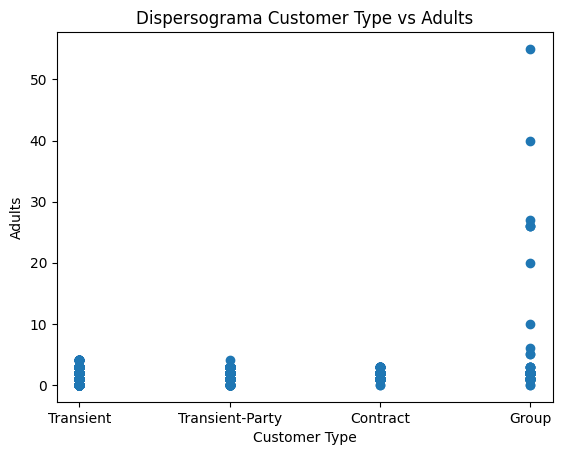

In [276]:
plt.scatter(df.customer_type,df.adults)
plt.title('Dispersograma Customer Type vs Adults')
plt.xlabel('Customer Type')
plt.ylabel('Adults')
plt.show()

## 10 *Children*

Es una totalmente típica pareja, y al final la reserva fue cancelada, y los demás datos no son extraños, ni nos resultan anormales, así que nuestra mejor consideración es: que ya que la moda de "children" es 0, superando ampliamente el porcentaje de frecuencia de los demás datos, consideramos cambiar el valor de este dato a 0

In [277]:
df.loc[df.children == 10]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
49181,Resort Hotel,55,2015,July,29,12,4,10,2,10.0,...,No Deposit,8.0,NaN,0,Contract,133.16,0,1,44093355-c1c8-41eb-bcb4-40dc494fa1a9,1


In [278]:
df_filtrado = df_filtrado.replace({'children': 10}, value=0)

## 9 *Babies*

Aunque esta reserva tiene otros valores tipicos, solo 8 reservas tienen más de un bebe, y de esas 8 solo esta tiene mas de 2. Entonces por la abrumadora cantidad de reservas con 0 bebes que van a estos hoteles consideramos lo más correcto mappear este valor como 0.

In [279]:
df.babies.value_counts()

0    61485
1      420
2        7
9        1
Name: babies, dtype: int64

In [280]:
df.loc[df.babies == 9]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
12659,City Hotel,11,2015,October,42,11,2,1,1,0.0,...,No Deposit,95.0,NaN,0,Transient-Party,95.0,0,0,a864cf91-980a-48da-9b71-c0b487096239,0


In [281]:
df_filtrado = df_filtrado.replace({'babies': 9}, value=0)

## *Adr* negativo

Es un caso único, así que la consideranción más acertada seria cambiar el valor por la mediana del campo "adr", que seria 95.

In [282]:
df_negative_adr = df[df['adr'] < 0]
df_negative_adr

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
21124,Resort Hotel,195,2017,March,10,5,4,6,2,0.0,...,No Deposit,273.0,NaN,0,Transient-Party,-6.38,0,0,869f627f-35fb-42b0-8376-12869739d76e,0


In [283]:
df_filtrado = df_filtrado.replace({'adr': -6.38}, value=df_filtrado['adr'].median())

df_filtrado[df_filtrado['adr'] < 0].shape

(0, 27)

## *Adr* cero

Este caso es muy poco probable, de hecho es menor a 2% del total de los casos, por lo cual conisderamos reemplazar por la mediana.

In [284]:
df_cero_adr = df[df['adr'] == 0]
df_cero_adr.shape

(884, 31)

In [285]:
# Reemplaza los valores 0 con la mediana
df_filtrado = df_filtrado.replace({'adr': 0}, value=df_filtrado['adr'].median())

df_filtrado[df_filtrado['adr'] == 0].shape

(0, 27)

##629 *Lead Time*

En los valores se puede observar que hay varios valores de lead_time iguales a 629. Entendiendo este como el tiempo que se tarda desde que se hace la reserva hasta la llegada al hotel, el dato ciertamente es bastante alto, pero no consideramos que sean casos imposibles de ocurrir.

Por otro lado, si vemos el grafico de distribuciones, podemos ver que hay un cierto salto cuando se llega a valores mayores a 600.

(array([18440.,  8915.,  6870.,  5611.,  4613.,  4268.,  3033.,  2089.,
         2355.,  1768.,  1428.,   772.,   563.,   409.,   352.,   122.,
           83.,    67.,    53.,   102.]),
 array([  0.  ,  31.45,  62.9 ,  94.35, 125.8 , 157.25, 188.7 , 220.15,
        251.6 , 283.05, 314.5 , 345.95, 377.4 , 408.85, 440.3 , 471.75,
        503.2 , 534.65, 566.1 , 597.55, 629.  ]),
 <BarContainer object of 20 artists>)

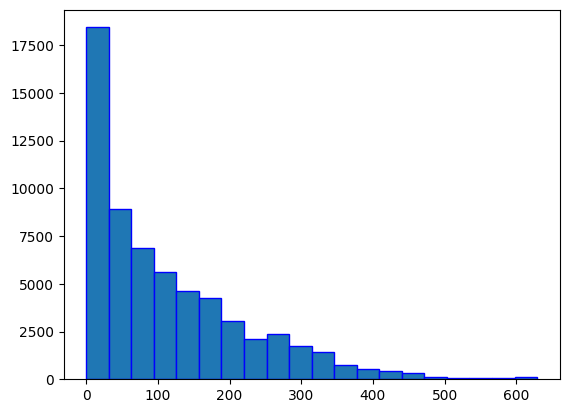

In [286]:
plt.hist(df['lead_time'], bins=20, edgecolor='b')

Si investigamos un poco mas, podemos ver que hay muchas filas repetidas en este grupo (pasamos de 102 filas a 11). Y aunque mas de 600 dias de anticipacion no es un tiempo extremadamente raro, tampoco es lo suficientemente comun para justificar tantas filas repetidas.
Por lo cual consideramos que hubo una falla en el sistema, y con el objetivo de suavizar el final del grafico, decidimos eliminar los repetidos.

In [287]:
df.loc[df.lead_time > 600].shape

(102, 31)

In [288]:
# Chequeando repetidos
df_chequeando_repetidos = df[(df['lead_time'] > 600)].drop('id', axis=1)
df_chequeando_repetidos = df_chequeando_repetidos.drop_duplicates()
df_chequeando_repetidos.shape

(11, 30)

In [289]:
# Sacando repetidos
df_lead_mayor_600 = df_filtrado.loc[df_filtrado['lead_time'] > 600]
df_lead_menor_600 = df_filtrado.loc[df_filtrado['lead_time'] <= 600]
df_lead_mayor_600.drop_duplicates(subset=[col for col in df_filtrado.columns if col not in 'id'], inplace=True)
df_filtrado = pd.concat([df_lead_mayor_600, df_lead_menor_600], ignore_index=True)

<ipython-input-289-3c0b5eac0722>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lead_mayor_600.drop_duplicates(subset=[col for col in df_filtrado.columns if col not in 'id'], inplace=True)


(array([1.844e+04, 8.915e+03, 6.870e+03, 5.611e+03, 4.613e+03, 4.268e+03,
        3.033e+03, 2.089e+03, 2.355e+03, 1.768e+03, 1.428e+03, 7.720e+02,
        5.630e+02, 4.090e+02, 3.520e+02, 1.220e+02, 8.300e+01, 6.700e+01,
        5.300e+01, 1.100e+01]),
 array([  0.  ,  31.45,  62.9 ,  94.35, 125.8 , 157.25, 188.7 , 220.15,
        251.6 , 283.05, 314.5 , 345.95, 377.4 , 408.85, 440.3 , 471.75,
        503.2 , 534.65, 566.1 , 597.55, 629.  ]),
 <BarContainer object of 20 artists>)

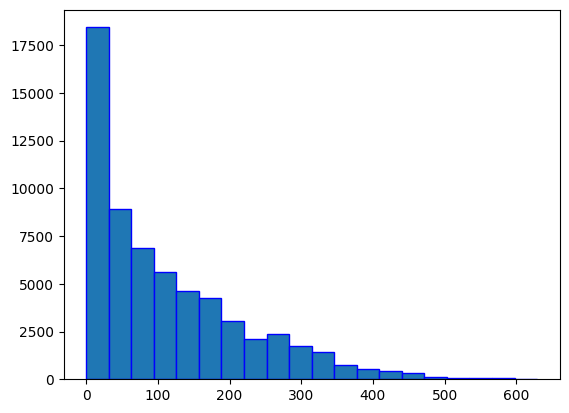

In [290]:
plt.hist(df_filtrado['lead_time'], bins=20, edgecolor='b')

## repetidos 25 *Previous Cancelations*

En su gran mayoria las reservas no fueron canceladas previamente por los usuarios, siendo este un gran porcentaje de 92.9%, y si sumamos el porcentaje de personas que solo cancelaron 1 vez tenemos un porcentaje de 99.6% con lo cual es muy poco probable que vaya alguien con más reservas previas cancelas, un motivo puede ser que si ya cancelo previamente dos veces es porque no le gustó algún servicio y ya no piensa volver.

In [291]:
df_previous_cancellations_porcent = df['previous_cancellations'].value_counts().reset_index()
df_previous_cancellations_porcent.columns = ['previous_cancellations', 'Conteo']
df_previous_cancellations_porcent['Porcentaje'] = (df_previous_cancellations_porcent['Conteo'] / len(df)) * 100

# ordenado por porcentaje
df_previous_cancellations_porcent

,previous_cancellations,Conteo,Porcentaje
0,0,57519,92.902944
1,1,4137,6.681957
2,2,61,0.098525
3,24,36,0.058146
4,3,34,0.054916
5,26,20,0.032303
6,19,17,0.027458
7,4,16,0.025843
8,25,16,0.025843
9,11,15,0.024228


In [292]:
df_previous_cancelations = df[(df['previous_cancellations'] > 25) & (df['is_canceled'] == 1)]
df_previous_cancelations.shape

(20, 31)

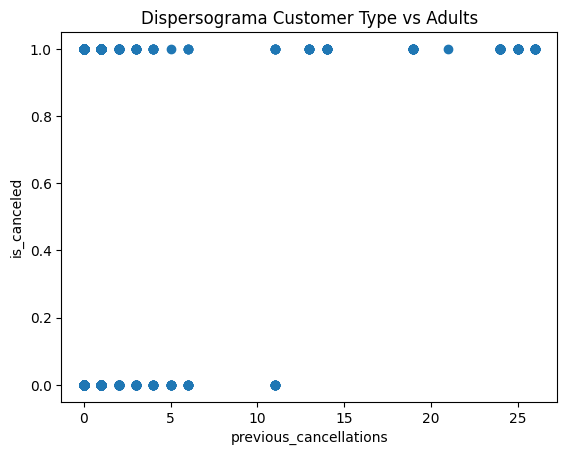

In [293]:
plt.scatter(df.previous_cancellations,df.is_canceled)
plt.title('Dispersograma Customer Type vs Adults')
plt.xlabel('previous_cancellations')
plt.ylabel('is_canceled')
plt.show()

Indagando mas en profundo, nos dimos cuenta que hay muchos repetidos cuando empezas a filtrar por previous_cancellations de gran tamaño, ejemplo:

In [294]:
df.loc[df.previous_cancellations == 25]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
1640,Resort Hotel,222,2015,September,38,15,1,5,2,0.0,...,Non Refund,252.0,NaN,0,Transient,49.95,0,0,ed2a9766-b46e-4259-8c92-8e5d24118d55,1
12104,Resort Hotel,222,2015,September,38,15,1,5,2,0.0,...,Non Refund,252.0,NaN,0,Transient,49.95,0,0,7723333d-c263-4c76-8fee-488f3eadfbdf,1
16321,Resort Hotel,222,2015,September,38,15,1,5,2,0.0,...,Non Refund,252.0,NaN,0,Transient,49.95,0,0,a940a4e0-4572-4393-863c-222c249ba1b8,1
17025,Resort Hotel,222,2015,September,38,15,1,5,2,0.0,...,Non Refund,252.0,NaN,0,Transient,49.95,0,0,73cdc6eb-be0b-4268-a73c-4360de5ba011,1
18178,Resort Hotel,222,2015,September,38,15,1,5,2,0.0,...,Non Refund,252.0,NaN,0,Transient,49.95,0,0,455d9008-1d5f-469c-8256-d599265871d4,1
24527,Resort Hotel,222,2015,September,38,15,1,5,2,0.0,...,Non Refund,252.0,NaN,0,Transient,49.95,0,0,868778a2-0192-4077-be7a-714f6b86013d,1
24799,Resort Hotel,222,2015,September,38,15,1,5,2,0.0,...,Non Refund,252.0,NaN,0,Transient,38.00,0,0,8e181c6b-e702-44b6-8bd4-3f24b60bc12f,1
25724,Resort Hotel,222,2015,September,38,15,1,5,2,0.0,...,Non Refund,252.0,NaN,0,Transient,49.95,0,0,1759f9af-8bad-49f0-ad38-e6a7063780f1,1
28265,Resort Hotel,222,2015,September,38,15,1,5,2,0.0,...,Non Refund,252.0,NaN,0,Transient,49.95,0,0,018213a3-4695-4027-bc21-df4ea71d9a27,1
31937,Resort Hotel,222,2015,September,38,15,1,5,2,0.0,...,Non Refund,252.0,NaN,0,Transient,49.95,0,0,13d58631-f848-440d-a669-f59a42536938,1


Por lo tanto decidimos eliminar todos los duplicados que tienen una cancelación > 10, ya que los encontramos sospechosos.

<Axes: xlabel='previous_cancellations', ylabel='Count'>

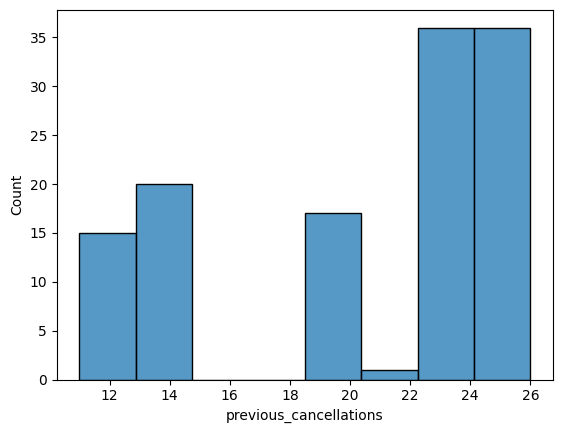

In [295]:
df_cancelaciones_filtradas = df[df['previous_cancellations']>10]
sns.histplot(data=df_cancelaciones_filtradas['previous_cancellations'])

In [296]:
df_mayor_10 = df_filtrado.loc[df_filtrado['previous_cancellations'] > 10]
df_menor_10 = df_filtrado.loc[df_filtrado['previous_cancellations'] <= 10]
df_mayor_10.drop_duplicates(subset=[col for col in df_filtrado.columns if col not in 'id'], inplace=True)
df_filtrado = pd.concat([df_mayor_10, df_menor_10], ignore_index=True)

<ipython-input-296-89a89f17be70>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mayor_10.drop_duplicates(subset=[col for col in df_filtrado.columns if col not in 'id'], inplace=True)


<Axes: xlabel='previous_cancellations', ylabel='Count'>

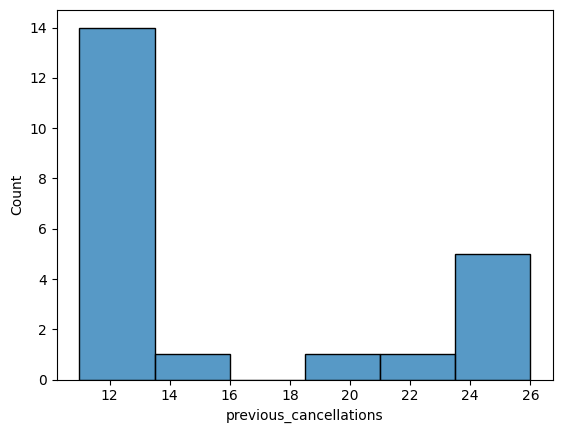

In [297]:
#Con duplicados eliminados
df_cancelaciones_filtradas = df_filtrado[df_filtrado['previous_cancellations']>10]
sns.histplot(data=df_cancelaciones_filtradas['previous_cancellations'])

## 70 *Previous Bookings Not Canceled*

Investigamos el caso de 70 bookings no canceladas

In [298]:
df_previous_bookings_not_canceled_porcent = df['previous_bookings_not_canceled'].value_counts().reset_index()
df_previous_bookings_not_canceled_porcent.columns = ['previous_bookings_not_canceled', 'Conteo']
df_previous_bookings_not_canceled_porcent['Porcentaje'] = (df_previous_bookings_not_canceled_porcent['Conteo'] / len(df)) * 100

# ordenado por porcentaje
df_previous_bookings_not_canceled_porcent

,previous_bookings_not_canceled,Conteo,Porcentaje
0,0,60375,97.515869
1,1,631,1.019172
2,2,258,0.416714
3,3,151,0.243891
4,4,103,0.166362
5,5,79,0.127598
6,6,44,0.071067
7,8,29,0.046840
8,7,29,0.046840
9,10,24,0.038764


Aunque hay valores exagerados como 70, este no es un valor mayor abrupto, si no que hay otros parecidos. Tambien, con el conteo, ya a plena vista podemos ver que estos valores grandes no son duplicados, entonces podrían ser simplemente de clientes especiales que frecuentan mucho los hoteles.

Por lo tanto no vamos a tocar estos datos.

## 17 *Booking Changes*

In [299]:
df_booking_changes_porcent = df['booking_changes'].value_counts().reset_index()
df_booking_changes_porcent.columns = ['booking_changes', 'Conteo']
df_booking_changes_porcent['Porcentaje'] = (df_booking_changes_porcent['Conteo'] / len(df)) * 100

# ordenado por porcentaje
# df_booking_changes_porcent.sort_values(by='booking_changes')
df_booking_changes_porcent

,booking_changes,Conteo,Porcentaje
0,0,53596,86.566634
1,1,5821,9.401903
2,2,1795,2.899230
3,3,407,0.657374
4,4,164,0.264888
5,5,58,0.093680
6,6,32,0.051685
7,7,16,0.025843
8,8,10,0.016152
9,13,3,0.004846


Igual que con 70 previous_bookings_not_canceled, por ahora no notamos que sean datos tan atipicos, si no que hay varios que se acercan a este maximo, por lo cual decidimos dejarlo.

## 8 *Required Car Parking Spaces*

In [300]:
df_filtrado['required_car_parking_spaces'].value_counts()

0    58647
1     3058
2       12
8        1
3        1
Name: required_car_parking_spaces, dtype: int64

In [301]:
df_filtrado[df_filtrado['required_car_parking_spaces']>1][['adults','required_car_parking_spaces','customer_type']]

,adults,required_car_parking_spaces,customer_type
651,3,2,Transient
2193,2,2,Transient-Party
8272,2,8,Transient-Party
9678,3,2,Transient
11046,2,2,Transient-Party
11810,2,2,Transient
13695,2,3,Transient
14369,3,2,Transient
22045,2,2,Transient-Party
38527,2,2,Transient-Party


Aca vemos unas inconsistencias en el hecho de que con las filas donde se requieren 3 u 8 espacios de estacionamiento, no hay suficientes adultos que puedan manejar tantos autos. Esto hace que las dos filas se nos resulten sospechosas.

Como no tenemos los suficientes datos para clientes que piden mas de 2 espacios, decidimos no editar estos datos ya que nos pueden ayudar a futuro, aun cuando parecen sospechosos.